# This code is for generating trajectories using RatInABox: https://github.com/RatInABox-Lab/RatInABox. Select the kernel of usr/bin/pytthon3 3.8.10 for loading the toolbox in the notebook

## Section 1: generate running trajectories in the open field

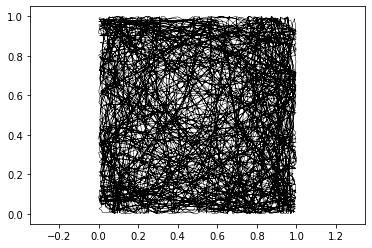

In [2]:

from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
import numpy as np
import matplotlib.pyplot as plt

Env = Environment(params={
    'scale':1,
    "dimensionality": "2D",
})

dur = 3600 #in seconds
dt = 0.1 #in seconds
speed_mean = 0.1 #in m/s

Ag = Agent(Env, params = {
    "dt": dt,
    "speed_mean":speed_mean,
    "speed_std": 0.02,
    "rotational_velocity_std": 30 * (np.pi / 180), #set to 120 or 360 will change the tutoriocity of the trajectory
    })

while Ag.t < dur:
    Ag.update(drift_velocity=None,drift_to_random_strength_ratio=1)

# Ag.plot_trajectory()

# print(Ag.rotational_velocity_std)

Position = Ag.history['pos']
Position = np.array(Position)
# Position_2_2pi = Position*(2*np.pi)-np.pi
Vel = Ag.history['vel']
Speed = np.linalg.norm(Vel, axis=1)
# Speed_2_2pi = Speed*(2*np.pi)

plt.Figure(figsize=(2,2), dpi=300)
plt.plot(Position[:,0], Position[:,1], linewidth=0.5, color='black')
plt.axis('equal')   

#save Position and Speed as a single npz indicating dur and speed_mean
np.savez('./traces/TwoDtrajectory_dur'+str(dur)+'_speedMean'+str(speed_mean)+'.npz', Position=Position, Speed=Speed, Velocity=Vel, dur=dur)

## Section 2: generate 1D trajectories for head direction cells with periodic boundary conditions

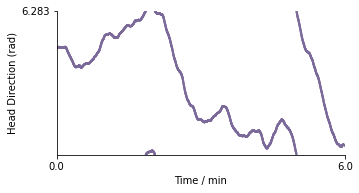

In [12]:

from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
import numpy as np
import matplotlib.pyplot as plt

Env = Environment(params={
    'scale':2*np.pi,
    "dimensionality": "1D",
    "boundary_conditions": "periodic", #periodic boundary conditions
})

dur = 360 #in seconds
dt = 0.01 #in seconds i.e., 100 Hz sampling rate 
speed_mean = 0. #in rad/s
speed_std = 0.1

Ag = Agent(Env, params = {
    "dt": dt,
    "speed_mean":speed_mean,
    "speed_std": speed_std,
    "speed_coherence_time": 20
    })


while Ag.t < dur:
    Ag.update(drift_velocity=None,drift_to_random_strength_ratio=1)

plt.Figure(figsize=(2,2), dpi=300)
Ag.plot_trajectory(t_end=900) #show the first 30 seconds of the trajectory
plt.ylabel('Head Direction (rad)')

Direction = Ag.history['pos']
Direction = np.array(Direction)-np.pi
Speed = -np.asarray(Ag.history['vel'])

# #save Head Direction and Speed as a single npz indicating dur and speed_mean
np.savez('./traces/OneDtrajectory_dur'+str(dur)+'_speedMean'+str(speed_mean)+'_speedStd'+str(speed_std)+'.npz', Direction=Direction, Speed=Speed)

#### constant rotating trajectory

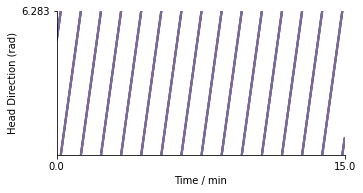

In [4]:

from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
import numpy as np
import matplotlib.pyplot as plt

Env = Environment(params={
    'scale':2*np.pi,
    "dimensionality": "1D",
    "boundary_conditions": "periodic", #periodic boundary conditions
})

dur = 3600 #in seconds
dt = 0.1 #in seconds
speed_mean = 0.1 #in rad/s

Ag = Agent(Env, params = {
    "dt": dt,
    "speed_mean":speed_mean,
    "speed_std": 0.0,
    "speed_coherence_time": 20
    })


while Ag.t < dur:
    Ag.update(drift_velocity=None,drift_to_random_strength_ratio=1)

plt.Figure(figsize=(2,2), dpi=300)
Ag.plot_trajectory(t_end=900) #show the first 30 seconds of the trajectory
plt.ylabel('Head Direction (rad)')
plt.savefig('./figures/HD_1DCAN/OneDConstanttrajectory_dur'+str(dur)+'_speedMean'+str(speed_mean)+'.png')

Direction = Ag.history['pos']
Direction = np.array(Direction)-np.pi
Speed = -np.asarray(Ag.history['vel'])

# #save Head Direction and Speed as a single npz indicating dur and speed_mean
np.savez('./traces/OneConstantDtrajectory_dur'+str(dur)+'_speedMean'+str(speed_mean)+'.npz', Direction=Direction, Speed=Speed)

In [42]:
Vel[0]

[-0.004655326976115148]